# Investigating Fandango Movie Ratings

In October 2015, Fandango caught themselves in a storm as a data journalist named Walt Hickney, a data journalist, found strong evidence to suggest that Fandango's rating system was dishonest and biased which was published in his [article](https://fivethirtyeight.com/features/fandango-movies-ratings/). Hickney found that there was a significant discrepancy between the number of stars displayed to users and the actual rating which was located within the HTML of the page. This arised due to the following:
* The actual rating was almost always rounded **up** to the nearest half-star.
* Of about 8% of the ratings analyzed, the rounding was done up to the nearest whole star.
* For one movie rating, the actual rating in the HTML was 4 but was displayed as 5 stars.

Fandango responded with the explanation of the discrepancy being a bug in the system rather than intentional and this has since been fixed. As such, this project aims to revisit Fandango ratings and determine if Fandango is still inflating ratings by looking at the more recent ratings data. That is, the goal of this project is to determine if there is a change in Fandango's rating system after the expose by Hickney.

# Understanding the Data

To determine if there's any changes, the rating system's characteristics from before and after the analysis should be compared with the help of ready-made data for both these periods of time. We will be making use of Walt Hickney's published data on his [Github](https://github.com/fivethirtyeight/data/tree/master/fandango) for the before data and Dataquest's published data on their [Github](https://github.com/mircealex/Movie_ratings_2016_17) for the after data - which contains ratings for movies released in 2016 and 2017.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading in the data sets as pandas DataFrames
before = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

In [3]:
before.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [4]:
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [5]:
# Isolating and selecting only the relevant columns
fandango_before = before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_after = after[['movie', 'year', 'fandango']].copy()

In [6]:
fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [7]:
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


The population of interest in this analysis is the ratings of all the movies on the Fandango website. The two samples used for the before and after data relate to the movies released in 2015 and 2016-17 respectively. However, the two samples are not necessarily representative for the population of interest. In the case of the before data, only movies with at least 30 user reviews on Fandango would be included while those that do not are excluded. In the case of the after data, only the movie ratings for the most popular movies with significant number of votes are included, excluding the less popular ones. 

# Changing the Goal of Our Analysis

As such, it is worthwhile to revise the current goal of the analysis to change the population of interest such that the samples are actually representative. The goal is instead to determine if there is a difference in Fandango's ratings for popular movies released in 2015 versus Fandango's ratings for popular movies released in 2016. The term "popular" appears to be vague but we will use Hickney's benchmark of 30 user reviews to consider a movie as "Popular".

In [8]:
# Double checking to see if the before data set indeed consists of only popular movies
fandango_before[fandango_before['Fandango_votes'] < 30].size

0

Indeed, Hickney's before data set only consists of movies with at least 30 reviews (i.e. deemed as "popular"). However, the before after data set does not contain any information on the number of reviews, giving rise to representativity issues. However, it is worth noting that the data set only consists of user ratings of the most popular movies with significant number of user views, as per the accompanying README.md. As such, we will take that as given and continue to isolate the both data sets to just movies released in 2015 and in 2016 respectively for the before and after data.

# Isolating the Data

Upon further inspection, both data sets would contain movies released not just in 2015 and 2016, but also in 2014 and 2017 respectively for the before and after data. As per our revised goal, we are only interested in the popular movies released in 2015 and 2016 so there would be a need to isolate the data accordingly to filter out the movies not released in 2015 and 2016. We will work with the after data first since there is a separate `year` column indicating the year of the release clearly.

In [9]:
# Inspecting the release years of movies in the after data
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [10]:
# Isolating only movies released in 2016
fandango_2016 = fandango_after[fandango_after['year'] == 2016].copy()
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

For the before data, the year of release is embedded within the name of the movie in the `FILM` column. To cater for this, we will create a separate `year` column first and then subsequently, filter out to select only the movies released in 2015.

In [11]:
# Creating a `year` column to extract out the year of release from the `FILM` column
year = fandango_before['FILM'].str.extract(r'\((.*)\)', expand=False)
fandango_before['year'] = year.astype(int)

In [12]:
fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [13]:
# Filtering out to select only the movies released in 2015
fandango_2015 = fandango_before[fandango_before['year'] == 2015]
fandango_2015['year'].value_counts()

2015    129
Name: year, dtype: int64

# Comparing Distribution Shapes

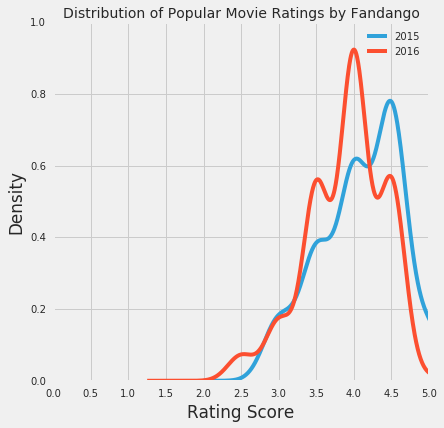

In [14]:
# Generate kernel density plots for both 2015 and 2016 popular movie ratings data
plt.style.use('fivethirtyeight')
fandango_2015['Fandango_Stars'].plot.kde(label='2015', figsize=(6,6))
fandango_2016['fandango'].plot.kde(label='2016')
plt.title('Distribution of Popular Movie Ratings by Fandango', fontsize=14)
plt.xlabel('Rating Score')
plt.xlim(0,5)
plt.xticks(np.arange(0,5.1,0.5))
plt.legend(loc='best')

Both distributions are strongly left skewed.
The 2016 distribution is slightly shifted to the left relative to the 2015 distribution.
The left skew suggests that movies on Fandango are given mostly high and very high ratings.

The slight left shift of the 2016 distribution shows that ratings were slightly lower in 2016 compared to 2015. This suggests that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015.

# Comparing Relative Frequencies

For greater granularity, besides the use of the kernel density plots, we ought to take a look at the frequency distribution table of the movie ratings for 2015 and 2016 and compare them. Since the number of movies are different for the two samples, relative frequencies by looking at the percentages should be looked at.

In [15]:
# Frequency distribution table for 2015
fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [16]:
# Frequency distribution table for 2016
fandango_2016['fandango'].value_counts(normalize=True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

Analyzing and comparing the two frequency distribution tables, we can tell that there is a difference between the two distributions with the 2016's ratings being lower than that of the 2015's ratings. In 2016, the highest ratings (4.5 and 5.0) had a much lower percentage of about 25.1% as compared to the 2015's high of over 44%. Ratings of 4.5 were the most popular in 2 015 but ratings of 4.0 were the most popular in 2016. The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015.

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. This could be interpreted as expected if Fandango indeed revise its rating system, which would translate to a greater percentage of movies in the 3.5 and 4 stars. Nevertheless, the direction of the difference is not that obvious by just looking at the frequency distribution tables.

# Determining the Direction of the Change

A better way to look at the direction of change is to look at the summary statistics.

In [17]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


Looking at the summary statistics, there is no change to the median. However, the mean rating has decreased just slightly from 2015 to 2016. The most common rating given by the mode is also lower at 4 in 2016 instead of 4.5 in 2015. As such, we can conclude decrease is slight, making the direction of change much clearer from the summary statistics.

([<matplotlib.axis.YTick at 0x7fe4c4710160>,
 <a list of 11 Text yticklabel objects>)

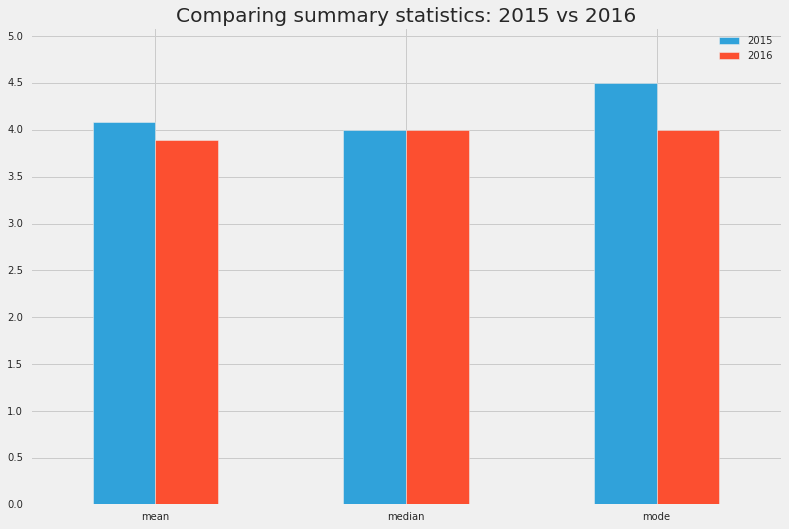

In [18]:
# Visualization of the summary statistics
summary.plot.bar(figsize=(12,8), rot = 0, title='Comparing summary statistics: 2015 vs 2016')
plt.ylim(0,5.1)
plt.yticks(np.arange(0,5.1,0.5))

# Conclusion

Overall, we can conclude that there appears to be a slight downwards revision to Fandango's movie ratings for popular movies in 2016 from 2015. Whether Fandango is still interfering with the popular movie ratings or not, more substantial data is required. Also, there could also be possibility that the popular movies in 2016 are *genuinely* better than the popular movies in 2015, translating to a higher rating for more of the popular movie ratings, which could in turn deflate the impact of Fandango's attempts to fix their rating system and so, the decrease in mean movie ratings is lesser than desired. Nevertheless, we could see that Fandango has rated lesser popular movies highly with the lower mode.